In [1]:
# NO CODE

from prob140 import *
from datascience import *
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

## Cumulative Distribution Function (CDF) ##

There are many ways of specifying distributions. We have sometimes used a table to display the distribution of a random variable $X$. At other times we have written $P(X = k)$ as a formula for each possible value $k$ of $X$.

Another useful function that encapsulates all the information about the distribution of $X$ is called the *cumulative distribution function* of $X$. That's a real mouthful, so it is usually abbreviated to the cdf of $X$. 

Let's see what the cdf is in an example.

Suppose $X$ has the distribution given below. It happens to be the binomial $(3, 1/2)$ distribution, but that is not important for this discussion.

|$~~~~~~~~~~~~~~~~~~~~~x$|0    |1    |2    |3    |
|-------:|:---:|:---:|:---:|:---:|
|$P(X=x)$|1/8  |3/8  |3/8  |1/8  |

The cdf of $X$ is another way of providing the same information. It is the function $F$ defined by

$$
F(x) ~ = ~ P(X \le x), ~~~~~ -\infty < x < \infty
$$

The cdf of the random variable $X$, evaluated at the point $x$, is the **chance that the value of $X$ is at most $x$**.

The gold area in the probability histogram below is $F(2)$.

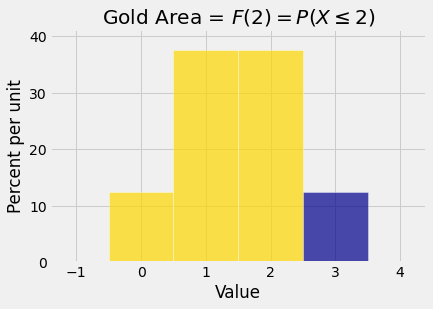

In [2]:
# NO CODE 

k = np.arange(4)
probs = [1/8, 3/8, 3/8, 1/8]
dist = Table().values(k).probabilities(probs)
Plot(dist, event=np.arange(3))
plt.title('Gold Area = $F(2) = P(X \leq 2)$');

We will sometimes use the loose term "left hand probabilities" to denote values of $F$. Each of those values $F(x)$ is the area of the bar at $x$ as well as all the bars to the left. In the figure above,

$$
F(2) ~ = ~ P(X \le 2) ~ = ~ P(X = 0) + P(X = 1) + P(X = 2)
$$

We will now augment the distribution table by a row containing some values of $F$. These are obtained obtained by adding the probabilities $P(X=x)$ successively from the left end. This *cumulative sum* is the reason for the name of the function.

|$~~~~~~~~~~~~~~~~~~~~~x$|0    |1    |2    |3    |
|-------:|:---:|:---:|:---:|:---:|
|$P(X=x)$|1/8  |3/8  |3/8  |1/8  |
|$F(x)$  |1/8  |4/8  |7/8  |1    |

Notice that we can recover $P(X=x)$ from values of $F$ as follows. For integer $x$,

$$
P(X = x) ~ = ~ P(X \le x) - P(X \le x-1) ~ = ~ F(x) - F(x-1)
$$

These calculations show that if you know the distribution of $X$ then you know the cdf of $X$, and vice versa. The distribution and the cdf contain the same information.

### Graph of the CDF ###

The graph of every cdf has some properties that are easy to see:

- The graph is non-decreasing.
- The values are on the vertical axis are probabilities and hence are between 0 and 1.
- The graph starts out at or near 0 for large negative values of $x$, and ends up at or near 1 for large positive values of $x$.

You can see all these properties in the graph of the function $F$ defined above.

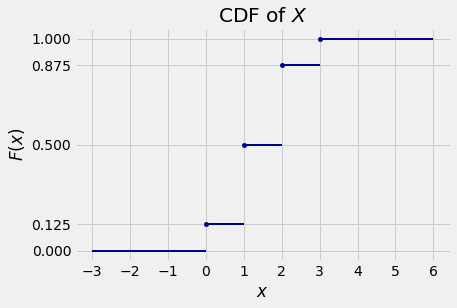

In [3]:
# NO CODE

k = range(4)
vals_F = [1/8, 4/8, 7/8, 1]
plt.plot([-3, 0], [0, 0], lw=2, color='darkblue')
for i in range(3):
    plt.plot([k[i], k[i+1]], [vals_F[i], vals_F[i]], lw=2, color='darkblue')
plt.plot([3, 6], [1, 1], lw=2, color='darkblue')
for i in k:
    plt.scatter(i, vals_F[i], s=20, color='darkblue')
plt.xticks(np.arange(-3, 7))
plt.yticks([0, 1/8, 4/8, 7/8, 1])
plt.xlabel('$x$')
plt.ylabel('$F(x)$')
plt.title('CDF of $X$');

You can see also that the graph has flat parts and jumps.

- **Flat parts:** These are in-between the possible values of $X$ and also beyond the possible values in both directions. Since $X$ is a non-negative variable, for all negative $x$ we have $F(x) = P(X \le x) = 0$. Since $X$ is always at most 3, for all $x > 3$ we have $F(x) = P(X \le x) = 1$. For $x$ in between two possible values, say $x = 1.6$, we have $F(1.6) = P(X \le 1.6) = P(X \le 1) = F(1)$. So for $x \in [1, 2)$, the graph is flat at $F(1)$. You can explain all the other flat parts analogously.

- **Jumps:** The graph has a jump (or discontinuity) at each possible value $x$ of $X$. That is, the graph jumps at each value $x$ such that $P(X = x) > 0$. The size of the jump at $x$ is equal to $P(X = x)$. For example, $P(X = 2)$ is the size of the jump at $x=2$, which is $0.875 - 0.5 = 0.375 = 3/8$.

### Computation ###

We will have many uses for the cdf in this course. In fact, we have already used it several times without giving it a name.

For example, the chance of at most 3 sixes in 20 rolls of a die is given by the binomial formula and the addition rule:

$$
P(\text{at most 3 sixes in 20 rolls}) ~ = ~ \sum_{k=0}^3 \binom{20}{k}(1/6)^k(5/6)^{20-k}
$$

This can be computed as 

In [4]:
sum(stats.binom.pmf(np.arange(4), 20, 1/6))

0.56654563777566946

Let $X$ be the number of sixes in 20 rolls. Then $X$ has the binomial $(20, 1/6)$ distribution. The answer above is $P(X \le 3)$. That's $F(3)$ where $F$ is the cdf of $X$.

The `stats` module includes a `cdf` method that allows us to obtain the answer directly without summing.

The expression `stats.binom.cdf(k, n, p)` evaluates to $F(k)$ where $F$ is the cdf of a binomial $(n, p)$ random variable.

So our answer can also be found as follows.

In [5]:
stats.binom.cdf(3, 20, 1/6)

0.56654563777566902

Probabilities are frequently computed as sums. The cdf is a very useful tool for doing this, so `stats` provides a `cdf` method associated with each distribution. 

You can use `stats.hypergeom.cdf(k, N, G, n)` to find the value of $F(k)$ for a random variable that has the hypergeometric $(N, G, n)$ distribution.

For example, recall that a standard deck contains 52 cards of which 12 are face cards. The chance of more than 5 face cards in a bridge hand of 13 cards dealt from a standard deck is

$$
\begin{align*}
&P(\text{more than 5 face cards in a hand of 13 cards}) \\
&= ~ 1 - P(\text{at most 5 face cards in the hand}) \\
&= ~ 1 - \sum_{k=0}^{5} \frac{\binom{12}{k}\binom{40}{13-k}}{\binom{52}{13}}
\end{align*}
$$

Now you can get the numerical value by using `stats.hypergeom.pmf`:

In [6]:
1 - stats.hypergeom.cdf(5, 52, 12, 13)

0.03246092516982535